# 2440023002 - Andreas Christianto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import scipy.spatial.distance as metric

%matplotlib inline

from sklearn.model_selection import train_test_split
#from sklearn.cluster import KMeans
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from scipy.stats import mode
from sklearn.metrics import mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/AndreChristianto/csv-UAS-ML/main/knn_datasets.csv'
df = pd.read_csv(url)

## Pre-Processing

In [3]:
df.isna().sum()

X1    0
X2    0
X3    1
X4    0
X5    0
X6    0
X7    0
X8    0
X9    0
dtype: int64

In [4]:
df = df.dropna()

## Correlation & Attributes Picking

<bound method NDFrame.head of      X1   X2    X3  X4   X5    X6     X7  X8  X9
0     3  126  88.0  41  235  39.3  0.704  27   0
1     8   99  84.0   0    0  35.4  0.388  50   0
2     7  196  90.0   0    0  39.8  0.451  41   1
3     9  119  80.0  35    0  29.0  0.263  29   1
4    11  143  94.0  33  146  36.6  0.254  51   1
..   ..  ...   ...  ..  ...   ...    ...  ..  ..
475   6  166  74.0   0    0  26.6  0.304  66   0
476   5  110  68.0   0    0  26.0  0.292  30   0
477   2   81  72.0  15   76  30.1  0.547  25   0
478   7  195  70.0  33  145  25.1  0.163  55   1
479   6  154  74.0  32  193  29.3  0.839  39   0

[479 rows x 9 columns]>


<Figure size 1800x216 with 0 Axes>

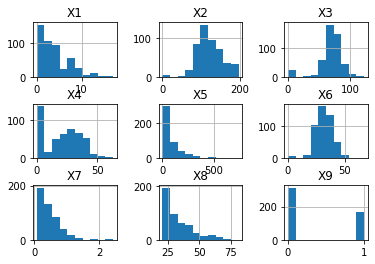

In [5]:
print(df.head)

plt.figure(figsize=(25, 3))

df.hist()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16, 9]
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

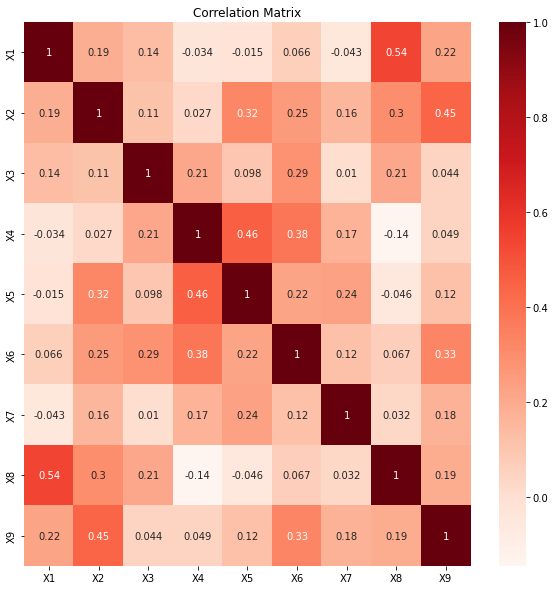

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap='Reds')
plt.title("Correlation Matrix")

Bisa dilihat di heatmap bahwa yang korelasi dengan X9 dari yang tertinggi ke yang terendah seperti berikut :
*   X2 (0.45)
*   X6 (0.33)
*   X1 (0.22)
*   X8 (0.19)
*   X7 (0.18)
*   X5 (0.12)
*   X4 (0.049)
*   X3 (0.044)


## Training & Testing

In [7]:
#X = df.drop(['X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], axis = 1)
#y = df['X9']

X = df.loc[:, ['X2']].values
y = df.loc[:, ['X9']].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
print(X_train.shape)
print(X_test.shape)

(359, 1)
(120, 1)


## Functions

In [10]:
class kNN:
  def __init__(ide, y, measure, mess):
    ide.y = y
    ide.measure = measure
    ide.mess = mess
  def distance_function(ide, a, b, x):
    prop = len(a)
    if x == -1:
      ham_distance = 0
      for i in range(prop):
        if a[i] != b[i]:
          ham_distance += 1
      return ham_distance
    distance = 0
    for i in range(prop):
      distance += abs(a[i] - b[i])**x
    distance = distance**(1/x)
    return distance

  def predict(ide, x_train, x_test, y_train):
    answer = []
    if ide.measure == 'manhattan':
      x = 1
    elif ide.measure == 'euclidian':
      x = 2
    elif ide.measure == 'minkowski':
      x = 3
    else:
      x =- 1
    for test_data in x_test:
      distances = []
      for t in range(len(x_train)):
        distance = ide.distance_function(test_data, x_train[t], x)
        distances.append(distance)
      distances = np.array(distances)
      sort = np.argsort(distances)[:ide.y]
      neighbor = y_train[sort]
      if ide.mess == 'regression':
        prediction = np.mean(neighbor)
      elif ide.mess == 'classification':
        prediction = mode(neighbor)
        prediction = prediction.mode[0]
      answer.append(prediction)
    return answer

## K-Optimal

In [20]:
distortion = []
for y in range(1, 15):
  model = kNN(y, 'euclidian', 'classification')
  pred = model.predict(X_train, X_test, y_train)
  distortion.append(np.sqrt(mean_squared_error(y_test, pred)))

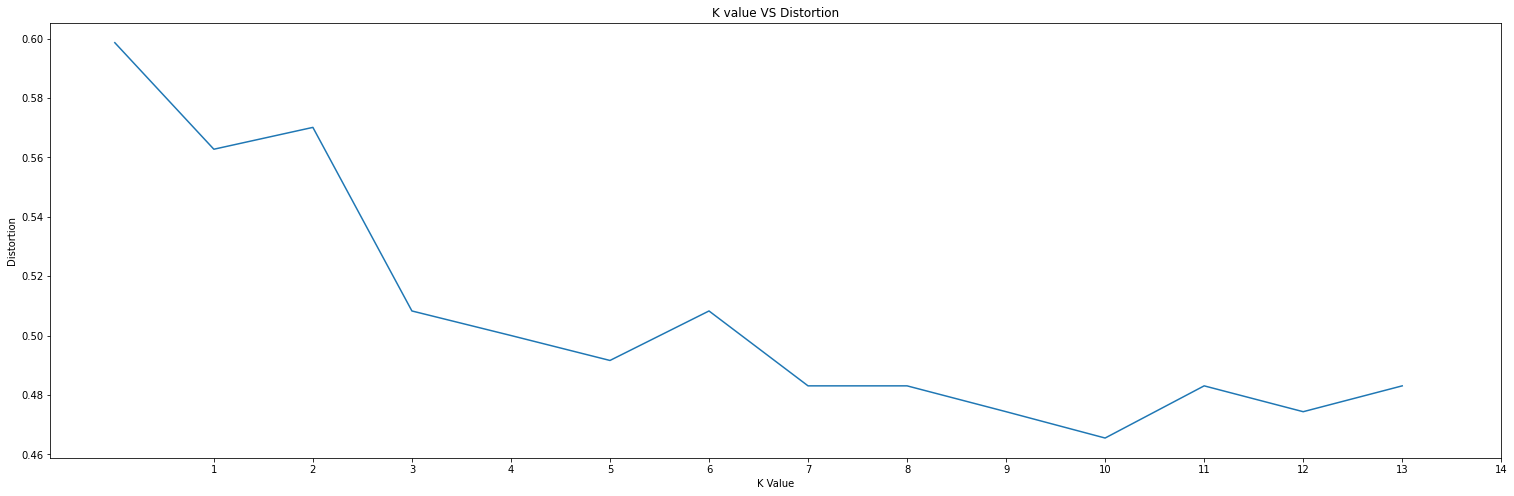

In [21]:
plt.figure(figsize=(26,8))
plt.plot(distortion)
plt.title('K value VS Distortion')
plt.xticks(np.arange(1,15))
plt.xlabel('K Value')
plt.ylabel('Distortion')
plt.show()

In [13]:
#distortions = []
#K = range(1,15)
#for k in K:
#    kmeanModel = KMeans(n_clusters=k)
#    kmeanModel.fit(df)
#    distortions.append(kmeanModel.inertia_)

In [14]:
#plt.figure(figsize=(14,7))
#plt.plot(K, distortions, 'bx-')
#plt.xlabel('k')
#plt.ylabel('Distortion')
#plt.title('Optimal K')
#plt.show()

Dari grafik di atas, bisa diketahui bahwa k paling optimal (tingkat distortion paling rendah) berada di k = 10

## Evaluasi (Accuracy, Precision, Recall)

In [15]:
model = kNN(10, 'euclidian', 'classification')
pred = model.predict(X_train, X_test, y_train)

In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        87
           1       0.65      0.39      0.49        33

    accuracy                           0.78       120
   macro avg       0.73      0.66      0.67       120
weighted avg       0.76      0.78      0.76       120



In [17]:
#knn = KNeighborsClassifier(n_neighbors=2)
#knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
#print(classification_report(y_test, y_pred))

## Confusion Matrix

In [18]:
cf_matrix = confusion_matrix(y_test, pred)

print(cf_matrix)

[[80  7]
 [20 13]]


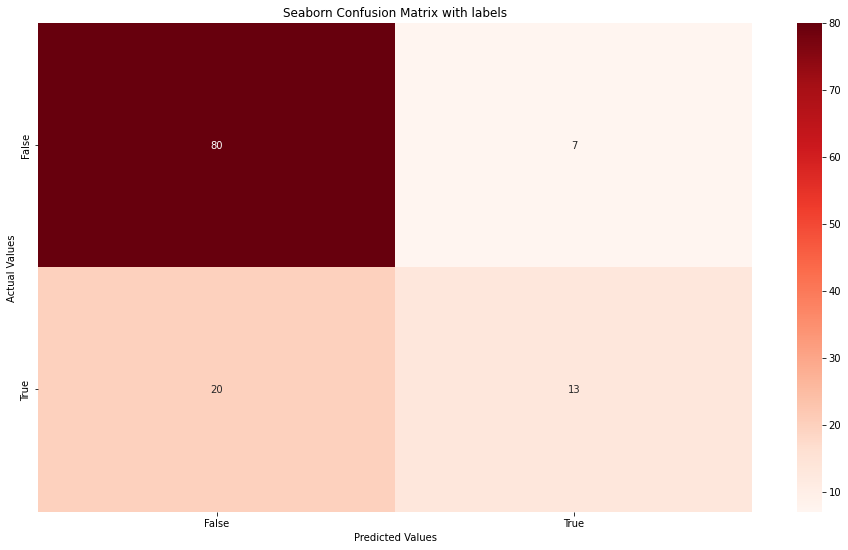

In [19]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()